In [1]:
import tensorflow as tf
import numpy as np

In [2]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat

tiny_data = read_csv("1.csv", usecols=[3, 4, 5, 6, 7])
tiny_data = DataFrame(tiny_data.as_matrix(), columns=['high', 'low', 'average', 'humidity', 'target'])

## 1. Convert target value to a ratio: power_today / power_yesterday to remove the time dependency between today's power consumption and yesterday's consumption

In [3]:
tiny_data.head()

,high,low,average,humidity,target
0,1.9,-0.4,0.7875,75.000,901.094080
1,6.2,-3.9,1.7625,77.250,744.658412
2,7.8,2.0,4.2375,72.750,743.560438
3,8.5,-1.2,3.0375,65.875,784.915894
4,7.9,-3.6,1.8625,55.375,685.154914


In [4]:
# Set the first target ratio to be 1, the scond value is day2 / day 1, util the last value
def ratio(dataset):
    target = dataset[['target']].as_matrix()
    ratio = list()
    ratio.append(1)
    for i in range(1, len(target)):
        value = target[i] / target[i - 1]
        ratio.append(value[0])
    return ratio

In [5]:
target = DataFrame(ratio(tiny_data))
target_np = ratio(tiny_data)
target.head()

,0
0,1.000000
1,0.826394
2,0.998526
3,1.055618
4,0.872902


In [6]:
import pandas as pd

ratio_d = tiny_data[['high', 'low', 'average', 'humidity']] 
ratio_df = pd.concat([ratio_d, target], axis=1)
ratio_df.columns = ['high', 'low', 'average', 'humidity', 'target']
ratio_df.head()

,high,low,average,humidity,target
0,1.9,-0.4,0.7875,75.000,1.000000
1,6.2,-3.9,1.7625,77.250,0.826394
2,7.8,2.0,4.2375,72.750,0.998526
3,8.5,-1.2,3.0375,65.875,1.055618
4,7.9,-3.6,1.8625,55.375,0.872902


In [7]:
# See the statistics information
ratio_df.describe()

,high,low,average,humidity,target
count,578.000000,578.000000,578.000000,578.000000,578.000000
mean,20.974740,12.712976,16.707818,76.481134,1.004465
std,9.218013,9.316424,9.087372,12.002461,0.106000
min,0.000000,-10.900000,-7.800000,39.125000,0.536749
25%,13.025000,4.925000,9.059375,69.156250,0.953329
50%,22.950000,13.950000,18.668750,78.250000,1.000166
75%,28.200000,20.575000,23.956250,85.000000,1.057694
max,38.100000,28.600000,32.575000,99.000000,1.454849


## 2. Next step is to handle temperature and humidity features

具体来说，对每个feature做成一度的categoritcal，然后one－hot encoding

In [8]:
new_ratio = ratio_df
np_array = new_ratio[['high', 'low', 'average']].as_matrix()
np_array

array([[  1.9   ,  -0.4   ,   0.7875],
       [  6.2   ,  -3.9   ,   1.7625],
       [  7.8   ,   2.    ,   4.2375],
       ..., 
       [ 29.9   ,  18.1   ,  23.7125],
       [ 29.3   ,  16.9   ,  23.325 ],
       [ 30.4   ,  18.6   ,  24.525 ]])

In [9]:
np_num1 = []
np_num2 = []
np_num3 = []

for num in np_array:
    np_num1.append(num[0])
    np_num2.append(num[1])
    np_num3.append(num[2])

In [12]:
# Convert high into categorical data

# Temp:
"""
-11 ~ -10: 'h0'
-10 ~ -9: 'h1'
-9 ~ -8: 'h2'
-8 ~ -7: 'h3'
-7 ~ -6: 'h4'
-6 ~ -5: 'h5'
-5 ~ -4: 'h6'
-4 ~ -3: 'h7'
-3 ~ -2: 'h8'
-2 ~ -1: 'h9'
-1 ~ 0: 'h10'
    
0 - 1: 'h11'
1 - 2: 'h12'
2 - 3: 'h13'
3 - 4: 'h14'
5 - 6: 'h15'
6 - 7: 'h16'
7 - 8: 'h17'
8 - 9: 'h18'
9 - 10: 'h19'
    
10 - 11: 'h20'
11 - 12: 'h21'
12 - 13: 'h22'
13 - 14: 'h23'
15 - 16: 'h24'
16 - 17: 'h25'
17 - 18: 'h26'
18 - 19: 'h27'
19 - 20: 'h28'
    
20 - 21: 'h29'
21 - 22: 'h30'
22 - 23: 'h31'
23 - 24: 'h32'
25 - 26: 'h33'
26 - 27: 'h34'
27 - 28: 'h35'
28 - 29: 'h36'
29 - 30: 'h37'
    
30 - 31: 'h38'
31 - 32: 'h39'
32 - 33: 'h40'
33 - 34: 'h41'
35 - 36: 'h42'
36 - 37: 'h43'
37 - 38: 'h44'
38 - 39: 'h45'
"""
 
nums = np_num3

for i in range(len(nums)):
    if nums[i] >= -11 and nums[i] < -10:
        nums[i] = 'h0'
    elif nums[i] >= -10 and nums[i] < -9:
        nums[i] = 'h1'
    elif nums[i] >= -9 and nums[i] < -8:
        nums[i] = 'h2'
    elif nums[i] >= -8 and nums[i] < -7:
        nums[i] = 'h3'
    elif nums[i] >= -7 and nums[i] < -6:
        nums[i] = 'h4'
    elif nums[i] >= -6 and nums[i] < -5:
        nums[i] = 'h5'
    elif nums[i] >= -5 and nums[i] < -4:
        nums[i] = 'h6'
    elif nums[i] >= -4 and nums[i] < -3:
        nums[i] = 'h7'
    elif nums[i] >= -3 and nums[i] < -2:
        nums[i] = 'h8'
    elif nums[i] >= -2 and nums[i] < -1:
        nums[i] = 'h9'
    elif nums[i] >= -1 and nums[i] < 0:
        nums[i] = 'h10'
    elif nums[i] >= 0 and nums[i] < 1:
        nums[i] = 'h11'
    elif nums[i] >= 1 and nums[i] < 2:
        nums[i] = 'h12'
    elif nums[i] >= 2 and nums[i] < 3:
        nums[i] = 'h13'
    elif nums[i] >= 3 and nums[i] < 4:
        nums[i] = 'h14'
    elif nums[i] >= 4 and nums[i] < 5:
        nums[i] = 'h15'
    elif nums[i] >= 5 and nums[i] < 6:
        nums[i] = 'h16'
    elif nums[i] >= 6 and nums[i] < 7:
        nums[i] = 'h17'
    elif nums[i] >= 7 and nums[i] < 8:
        nums[i] = 'h18'
    elif nums[i] >= 8 and nums[i] < 9:
        nums[i] = 'h19'
    elif nums[i] >= 9 and nums[i] < 10:
        nums[i] = 'h20'
    elif nums[i] >= 10 and nums[i] < 11:
        nums[i] = 'h21'
    elif nums[i] >= 11 and nums[i] < 12:
        nums[i] = 'h22'
    elif nums[i] >= 12 and nums[i] < 13:
        nums[i] = 'h23'
    elif nums[i] >= 13 and nums[i] < 14:
        nums[i] = 'h24'
    elif nums[i] >= 14 and nums[i] < 15:
        nums[i] = 'h25'
    elif nums[i] >= 15 and nums[i] < 16:
        nums[i] = 'h26'
    elif nums[i] >= 16 and nums[i] < 17:
        nums[i] = 'h27'
    elif nums[i] >= 17 and nums[i] < 18:
        nums[i] = 'h28'
    elif nums[i] >= 18 and nums[i] < 19:
        nums[i] = 'h29'
    elif nums[i] >= 19 and nums[i] < 20:
        nums[i] = 'h30'
    elif nums[i] >= 20 and nums[i] < 21:
        nums[i] = 'h31'
    elif nums[i] >= 21 and nums[i] < 22:
        nums[i] = 'h32'
    elif nums[i] >= 22 and nums[i] < 23:
        nums[i] = 'h33'
    elif nums[i] >= 23 and nums[i] < 24:
        nums[i] = 'h34'
    elif nums[i] >= 24 and nums[i] < 25:
        nums[i] = 'h35'
    elif nums[i] >= 25 and nums[i] < 26:
        nums[i] = 'h36'
    elif nums[i] >= 26 and nums[i] < 27:
        nums[i] = 'h37'
    elif nums[i] >= 27 and nums[i] < 28:
        nums[i] = 'h38'
    elif nums[i] >= 28 and nums[i] < 29:
        nums[i] = 'h39'
    elif nums[i] >= 29 and nums[i] < 30:
        nums[i] = 'h40'
    elif nums[i] >= 30 and nums[i] < 31:
        nums[i] = 'h41'
    elif nums[i] >= 31 and nums[i] < 32:
        nums[i] = 'h42'
    elif nums[i] >= 32 and nums[i] < 33:
        nums[i] = 'h43'
    elif nums[i] >= 33 and nums[i] < 34:
        nums[i] = 'h44'
    elif nums[i] >= 34 and nums[i] < 35:
        nums[i] = 'h45'
    elif nums[i] >= 35 and nums[i] < 36:
        nums[i] = 'h46'
    elif nums[i] >= 36 and nums[i] < 37:
        nums[i] = 'h47'
    elif nums[i] >= 37 and nums[i] < 38:
        nums[i] = 'h48'
    elif nums[i] >= 38 and nums[i] < 39:
        nums[i] = 'h49'


In [13]:
df_num1 = DataFrame(np_num1, columns=['high'])
df_num2 = DataFrame(np_num2, columns=['low'])
df_num3 = DataFrame(np_num3, columns=['average'])

df_num1.head()

,high
0,h12
1,h17
2,h18
3,h19
4,h18


In [14]:
pd_high = pd.get_dummies(df_num1, prefix=['high'])
pd_low = pd.get_dummies(df_num2, prefix=['low'])
pd_average = pd.get_dummies(df_num3, prefix=['aver'])

In [15]:
features = pd.concat([pd_high, pd_low, pd_average], axis=1)
features.head()

,high_h11,high_h12,high_h13,high_h14,high_h15,high_h16,high_h17,high_h18,high_h19,high_h20,...,aver_h37,aver_h38,aver_h39,aver_h40,aver_h41,aver_h42,aver_h43,aver_h6,aver_h8,aver_h9
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Normalized the humidity feature and concatenate the features together

In [16]:
# Normalize humidity
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
humidity_scaled = min_max_scaler.fit_transform(ratio_df[['humidity']])
humidity_scaled

array_hum = []
for num in humidity_scaled:
    array_hum.append(num[0])
    
pd_hum = DataFrame(array_hum, columns=[['humidity']])
pd_hum.head()

,humidity
0,0.599165
1,0.636743
2,0.561587
3,0.446764
4,0.271399


In [17]:
features_ = pd.concat([features, pd_hum], axis=1)
features_.head()

,high_h11,high_h12,high_h13,high_h14,high_h15,high_h16,high_h17,high_h18,high_h19,high_h20,...,aver_h38,aver_h39,aver_h40,aver_h41,aver_h42,aver_h43,aver_h6,aver_h8,aver_h9,humidity
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.599165
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.636743
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.561587
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.446764
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.271399


In [18]:
## 4. Add Holiday (weekday and weekend) as a feature - holiday
holiday = [0] * 578
holiday[0] = 1
end = 1
while end + 5 <= 577:
    end += 5
    holiday[end] = 1
    
    end += 1
    holiday[end] = 1
    
    end += 1

len(holiday)

578

In [19]:
final_features = pd.concat([features_, DataFrame(holiday, columns=['holiday'])], axis=1)
final_features.head()

,high_h11,high_h12,high_h13,high_h14,high_h15,high_h16,high_h17,high_h18,high_h19,high_h20,...,aver_h39,aver_h40,aver_h41,aver_h42,aver_h43,aver_h6,aver_h8,aver_h9,humidity,holiday
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.599165,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.636743,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.561587,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.446764,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.271399,0


In [20]:
final_features.shape

(578, 118)

## 4. Run SVM to get the baseline

In [21]:
# Test using SVM
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(final_features, target_np, test_size=0.25)

regressor = SVR(C=0.1, kernel='rbf', epsilon=0.01)
regressor.fit(X_train, y_train)

mean_absolute_error(y_test, regressor.predict(X_test)) 

/home/mguo/Downloads/ENTER/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.074992097748792397

In [22]:
# Define loss function using error rate which is abs(predicted - target) / target
def loss(y_test, y_pred):
    error = 0
    for y in zip(y_test, y_pred):
        error += abs(y[0] - y[1]) / y[0]
        
    return error / len(y_test)

In [23]:
loss(y_test, regressor.predict(X_test))

0.076737287600009321

In [24]:
np_features = np.asarray(final_features)
np_target = np.asarray(target_np)

In [25]:
Y_pred = regressor.predict(final_features)
loss(target_np, Y_pred)

0.074128625324297634

### Two Baselines: 

1. Linear Regressor
2. Decision Tree Regressor

In [32]:
# Baseline 1: Linear Regressor

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

loss(y_test, reg.predict(X_test))

0.08045161221778746

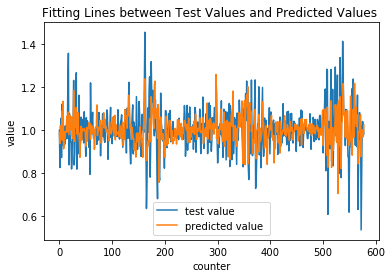

In [33]:
PlotHistory(target_np, reg.predict(np_features))

In [37]:
# Baseline 2: Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X_train, y_train)

loss(y_test, reg.predict(X_test)) 

0.08046609704482019

In [38]:
# Predict Error for All Data using Decision Tree Regressor
Y_pred = reg.predict(final_features)
loss(target_np, Y_pred)

0.075150809757019751

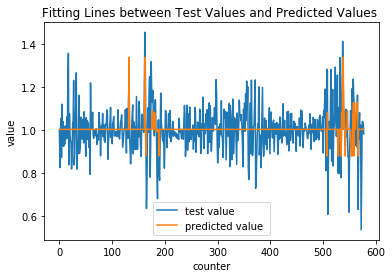

In [39]:
PlotHistory(target_np, Y_pred)

## 5. Show the Graph

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
def PlotHistory(y_test, y_pred):
    f, ax = plt.subplots()
    ax.plot(y_test)
    ax.plot(y_pred)
    ## Plot legend and use the best location automatically: loc = 0.
    ax.legend(['test value ', 'predicted value '], loc = 0) 
    ax.set_title('Fitting Lines between Test Values and Predicted Values ')
    ax.set_xlabel('counter')
    ax.set_ylabel('value') 

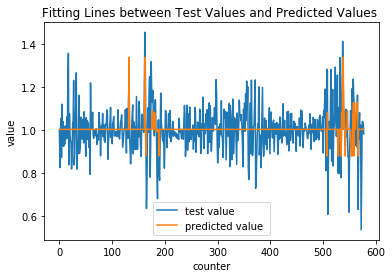

In [49]:
PlotHistory(target_np, Y_pred)

## 6. Deep Learning - Using Keras for building the network

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [42]:
# 1. Define Neural model
def baseline_model():
    model = Sequential()
    model.add(Dense(64, input_dim=118, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(15, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(15, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_absolute_error', optimizer='adam')
    
    return model

In [43]:
# 2. Build the model
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=5, verbose=0)

In [44]:
# 3.1. Feed the data and get the evaluation results (3 layers)
np_features = np.asarray(final_features)
np_target = np.asarray(target_np)

X = np_features
Y = np_target
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.5f (%.5f) Error Rate" % (results.mean(), results.std()))

Results: 0.08025 (0.02706) Error Rate


## 7. Deeper Model

### 7.1  8-layers model

In [45]:
from keras.layers.normalization import BatchNormalization

In [46]:
# 1. Define Neural model
def deep_model():
    model = Sequential()
    
    model.add(Dense(64, input_dim=118, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(15, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(15, activation='relu'))
    model.add(Dropout(0.1))
    
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1))
    
    model.compile(loss='mean_absolute_error', optimizer='adam')
    
    return model

In [47]:
# 2. Build the model
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=deep_model, nb_epoch=50, batch_size=5, verbose=0)

In [48]:
# 3. Feed the data and get the evaluation results (8 layers)
np_features = np.asarray(final_features)
np_target = np.asarray(target_np)

X = np_features
Y = np_target
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.5f (%.5f) Error Rate" % (results.mean(), results.std()))

Results: 0.07758 (0.02367) Error Rate


### 7.2: 9-layers model

In [132]:
# 1. Define Neural model
def deep_model():
    model = Sequential()
    
    model.add(Dense(100, input_dim=118, activation='relu'))
    model.add(Dropout(0.6))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(15, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(15, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(5, activation='relu'))
    
    model.add(Dense(1))
    
    model.compile(loss='mean_absolute_error', optimizer='adam')
    
    return model

In [133]:
# 2. Build the model
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=deep_model, nb_epoch=50, batch_size=5, verbose=0)

In [134]:
# 3. Feed the data and get the evaluation results (8 layers)
np_features = np.asarray(final_features)
np_target = np.asarray(target_np)

X = np_features
Y = np_target
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.5f (%.5f) Error Rate" % (results.mean(), results.std()))

Results: 0.07819 (0.02566) Error Rate


### 7.3: 10-layers model

In [136]:
# 1. Define Neural model
def deep_model():
    model = Sequential()
    
    model.add(Dense(64, input_dim=118, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(15, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(15, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(7, activation='relu'))
    
    model.add(Dense(1))
    
    model.compile(loss='mean_absolute_error', optimizer='adam')
    
    return model

In [137]:
# 2. Build the model
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=deep_model, nb_epoch=50, batch_size=5, verbose=0)

In [138]:
# 3. Feed the data and get the evaluation results (8 layers)
np_features = np.asarray(final_features)
np_target = np.asarray(target_np)

X = np_features
Y = np_target
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.5f (%.5f) Error Rate" % (results.mean(), results.std()))

Results: 0.07829 (0.02331) Error Rate


### 7.4: 8-layers model with 100 training iteration

In [152]:
# 1. Define Neural model
def deep_model():
    model = Sequential()
    
    model.add(Dense(64, input_dim=118, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(15, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(15, activation='relu'))
    model.add(Dropout(0.1))
    
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1))
    
    model.compile(loss='mean_absolute_error', optimizer='adam')
    
    return model

In [155]:
# 2. Build the model
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=deep_model, nb_epoch=110, batch_size=5, verbose=0)

In [156]:
# 3. Feed the data and get the evaluation results (8 layers)
np_features = np.asarray(final_features)
np_target = np.asarray(target_np)

X = np_features
Y = np_target
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.5f (%.5f) Error Rate" % (results.mean(), results.std()))

Results: 0.07758 (0.02367) Error Rate


## Summary: the best and accurate error rate is 7.758% for site 1 using MLP models

## In the next session, we will focus on the multitask learning so how it can improve the error rate (e.g. for the first observation site)

# 8. Multitask Learning

## Part 1: data preprocessing for all observation sites

In [50]:
all_data = read_csv("data.csv")
all_data.head()

,year,month,day,high,low,average,humidity,target_1,target_2,target_3,...,target_37,target_38,target_39,target_40,target_41,target_42,target_43,target_44,target_45,target_46
0,2015,2,1,1.9,-0.4,0.7875,75.000,901.094080,162.949446,727.585676,...,478.261740,612.896364,747.532996,965.241734,841.822074,428.932244,315.977223,610.669157,715.010485,464.724511
1,2015,2,2,6.2,-3.9,1.7625,77.250,744.658412,144.802486,629.108444,...,397.217620,471.977703,613.450655,967.654491,678.675733,377.299306,304.421079,475.282134,654.681175,436.077693
2,2015,2,3,7.8,2.0,4.2375,72.750,743.560438,107.367718,633.000613,...,469.580215,468.818233,590.410559,918.974466,634.091766,423.005614,279.511575,475.837467,586.668844,450.792579
3,2015,2,4,8.5,-1.2,3.0375,65.875,784.915894,139.150299,631.792933,...,426.806403,406.796248,529.548238,799.568921,661.479923,368.000699,282.622732,465.404321,595.074607,420.071264
4,2015,2,5,7.9,-3.6,1.8625,55.375,685.154914,90.278503,575.140527,...,413.930428,428.102990,510.400056,705.148753,567.459090,373.563940,263.720232,432.416071,589.593886,401.559982


In [51]:
del all_data['year']
del all_data['month']
del all_data['day']
del all_data['high']
del all_data['low']
del all_data['average']
del all_data['humidity']

all_data.head()

,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,target_9,target_10,...,target_37,target_38,target_39,target_40,target_41,target_42,target_43,target_44,target_45,target_46
0,901.094080,162.949446,727.585676,-11.153406,123.609260,472.958564,834.962039,-4.321780,428.579080,219.059225,...,478.261740,612.896364,747.532996,965.241734,841.822074,428.932244,315.977223,610.669157,715.010485,464.724511
1,744.658412,144.802486,629.108444,3.139475,130.035425,446.337262,722.044629,13.753263,366.430302,262.458704,...,397.217620,471.977703,613.450655,967.654491,678.675733,377.299306,304.421079,475.282134,654.681175,436.077693
2,743.560438,107.367718,633.000613,-0.738059,95.405784,433.472087,749.277117,10.625347,329.560499,261.630709,...,469.580215,468.818233,590.410559,918.974466,634.091766,423.005614,279.511575,475.837467,586.668844,450.792579
3,784.915894,139.150299,631.792933,-10.069709,101.578663,399.229170,645.384388,18.048176,322.957442,229.032526,...,426.806403,406.796248,529.548238,799.568921,661.479923,368.000699,282.622732,465.404321,595.074607,420.071264
4,685.154914,90.278503,575.140527,-9.510255,108.534308,347.921127,621.195936,22.420897,327.327788,203.715167,...,413.930428,428.102990,510.400056,705.148753,567.459090,373.563940,263.720232,432.416071,589.593886,401.559982


In [52]:
all_data.describe()

,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,target_9,target_10,...,target_37,target_38,target_39,target_40,target_41,target_42,target_43,target_44,target_45,target_46
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,...,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,586.197709,285.046500,490.772663,156.048659,130.074646,312.434679,620.881838,114.019559,326.655980,215.219510,...,520.247194,418.178387,466.768330,552.271783,438.914756,287.312055,180.595186,410.572202,459.142460,371.664700
std,286.091280,199.862399,265.355729,174.256129,93.745707,196.657463,253.733802,99.625866,143.891431,137.811505,...,307.429948,242.690925,221.037984,263.522635,226.066905,149.633136,117.846971,192.013776,223.947843,212.250247
min,336.740122,21.150318,257.353534,-21.029919,35.995113,146.090480,393.617875,-14.804657,169.357817,104.390113,...,202.390508,230.925056,245.542608,291.913877,237.063207,158.577664,71.509404,237.953428,247.884440,210.482247
25%,410.332065,158.771288,332.233835,20.021201,79.094940,204.317552,469.745409,63.684747,236.494372,146.301021,...,352.041091,287.216682,339.478272,384.982720,305.145365,200.212154,109.130605,292.101183,314.714729,253.356933
50%,485.718435,241.455904,386.451650,122.507413,104.840755,240.559336,530.999904,92.559172,273.114090,163.698986,...,404.220756,329.574199,392.496892,459.141288,359.704440,235.196266,136.467067,339.309297,367.066054,296.224312
75%,645.223982,330.669537,524.913644,202.174512,149.374484,340.166474,654.929093,124.456267,351.386976,218.649802,...,564.388729,428.072956,501.345673,621.606897,464.333773,306.749532,209.058687,455.204775,513.154812,381.400179
max,1957.846210,1207.689996,1735.690175,983.147059,660.409882,1271.516219,1849.143185,601.685769,936.294368,931.763994,...,2035.097195,1586.692112,1573.637670,1723.167363,1537.294793,1041.672818,756.588113,1267.950940,1479.794424,1432.856096


In [53]:
# Handle Abnormal Data - Replace the value 0 and negative value to be 1 (for computing ratio)
def remove_abnormal(all_data):
    for index, row in all_data.iterrows():
        for i in range(len(row)):
            if row[i] <= 0:
                row[i] = 1
    
remove_abnormal(all_data)

In [54]:
all_data.describe()

,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,target_9,target_10,...,target_37,target_38,target_39,target_40,target_41,target_42,target_43,target_44,target_45,target_46
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,...,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,586.197709,285.046500,490.772663,156.752025,130.074646,312.434679,620.881838,114.081615,326.655980,215.219510,...,520.247194,418.178387,466.768330,552.271783,438.914756,287.312055,180.595186,410.572202,459.142460,371.664700
std,286.091280,199.862399,265.355729,173.604069,93.745707,196.657463,253.733802,99.551351,143.891431,137.811505,...,307.429948,242.690925,221.037984,263.522635,226.066905,149.633136,117.846971,192.013776,223.947843,212.250247
min,336.740122,21.150318,257.353534,0.152396,35.995113,146.090480,393.617875,0.497008,169.357817,104.390113,...,202.390508,230.925056,245.542608,291.913877,237.063207,158.577664,71.509404,237.953428,247.884440,210.482247
25%,410.332065,158.771288,332.233835,20.021201,79.094940,204.317552,469.745409,63.684747,236.494372,146.301021,...,352.041091,287.216682,339.478272,384.982720,305.145365,200.212154,109.130605,292.101183,314.714729,253.356933
50%,485.718435,241.455904,386.451650,122.507413,104.840755,240.559336,530.999904,92.559172,273.114090,163.698986,...,404.220756,329.574199,392.496892,459.141288,359.704440,235.196266,136.467067,339.309297,367.066054,296.224312
75%,645.223982,330.669537,524.913644,202.174512,149.374484,340.166474,654.929093,124.456267,351.386976,218.649802,...,564.388729,428.072956,501.345673,621.606897,464.333773,306.749532,209.058687,455.204775,513.154812,381.400179
max,1957.846210,1207.689996,1735.690175,983.147059,660.409882,1271.516219,1849.143185,601.685769,936.294368,931.763994,...,2035.097195,1586.692112,1573.637670,1723.167363,1537.294793,1041.672818,756.588113,1267.950940,1479.794424,1432.856096


In [55]:
all_data.shape

(578, 46)

In [56]:
# Set the first target ratio to be 1, the scond value is day2 / day 1, util the last value for each columns
def ratio(dataset):
    result = []
    for target in all_data.columns:
        target = dataset[[target]].as_matrix()
        ratio = []
        ratio.append(1.0)
        for i in range(1, len(target)):
            value = target[i] / target[i - 1]
            ratio.append(value[0])
        result.append(ratio)
    return result

In [57]:
all_ratio = ratio(all_data)

In [58]:
# Concatenate the ratio data from each column into DataFrame

def concatenate(all_ratio):
    temp_first = DataFrame(all_ratio[0], columns=['target1'])
    i = 1
    for ratio in all_ratio[1:]:
        i += 1
        temp_second = DataFrame(ratio, columns=['target' + str(i)])
        temp_first = pd.concat([temp_first, temp_second], axis=1)
    return temp_first

In [59]:
df_ratio = concatenate(all_ratio)
df_ratio.shape

(578, 46)

In [60]:
df_ratio.head()

,target1,target2,target3,target4,target5,target6,target7,target8,target9,target10,...,target37,target38,target39,target40,target41,target42,target43,target44,target45,target46
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.826394,0.888634,0.864652,3.139475,1.051988,0.943713,0.864763,13.753263,0.854989,1.198118,...,0.830544,0.770078,0.820634,1.002500,0.806199,0.879624,0.963427,0.778297,0.915625,0.938357
2,0.998526,0.741477,1.006187,0.318525,0.733691,0.971176,1.037716,0.772569,0.899381,0.996845,...,1.182174,0.993306,0.962442,0.949693,0.934307,1.121141,0.918174,1.001168,0.896114,1.033744
3,1.055618,1.296016,0.998092,1.000000,1.064701,0.921003,0.861343,1.698596,0.979964,0.875404,...,0.908911,0.867706,0.896915,0.870067,1.043193,0.869966,1.011131,0.978074,1.014328,0.931850
4,0.872902,0.648784,0.910331,1.000000,1.068475,0.871482,0.962521,1.242280,1.013532,0.889460,...,0.969832,1.052377,0.963841,0.881911,0.857863,1.015117,0.933118,0.929119,0.990790,0.955933


In [78]:
target_matrix = []
for column in df_ratio.columns:
    temp = df_ratio[column].as_matrix()
    target_matrix.append(temp)

### Now: the 'target_matrix' is the label matrix for all sites, Our Target Data for all the 46 Observation Sites  are ready!!

## Part 2: Next We will build multi-task network architecture!

In [63]:
import keras.backend as K

In [81]:
# Build shared layers and individual layers
from keras.layers import Input
from keras.models import Model

# First, build the shared layers
main_input = Input(shape=(118,), name='main_input')

shared_layer1 = Dense(64, activation='relu')(main_input)
shared_layer1 = Dropout(0.5)(shared_layer1)

shared_layer2 = Dense(32, activation='relu')(shared_layer1)
shared_layer2 = Dropout(0.3)(shared_layer2)
    
shared_layer = Dense(15, activation='relu')(shared_layer2)
shared_layer = Dropout(0.3)(shared_layer)

# Second, build the individual layers for each site.
Output = []
for i in range(1, 47):
    layer = Dense(15, activation='relu')(shared_layer)
    layer = Dense(1, name='output' + str(i))(layer)
    Output.append(layer)
    

# Third, build the model for the 46 sites.
model = Model(inputs=[main_input], outputs=Output)
model.compile(optimizer='adam', loss='mean_absolute_error')

# Fourth, feed the data into the model
model.fit([np_features], target_matrix, epochs=100, batch_size=20)

Epoch 1/100
578/578 [==============================] - 2s - loss: 41.5586 - output1_loss: 0.7680 - output2_loss: 0.5286 - output3_loss: 0.5518 - output4_loss: 1.8510 - output5_loss: 0.9475 - output6_loss: 0.8898 - output7_loss: 0.6873 - output8_loss: 0.8248 - output9_loss: 0.9124 - output10_loss: 0.5130 - output11_loss: 0.8495 - output12_loss: 0.9242 - output13_loss: 0.8408 - output14_loss: 0.6463 - output15_loss: 0.5695 - output16_loss: 1.1200 - output17_loss: 0.5514 - output18_loss: 1.1007 - output19_loss: 0.6420 - output20_loss: 0.8799 - output21_loss: 1.0026 - output22_loss: 0.5080 - output23_loss: 0.7182 - output24_loss: 1.0777 - output25_loss: 0.9078 - output26_loss: 0.9430 - output27_loss: 1.0552 - output28_loss: 0.7856 - output29_loss: 1.0009 - output30_loss: 0.8558 - output31_loss: 0.4946 - output32_loss: 0.8394 - output33_loss: 0.5479 - output34_loss: 4.0981 - output35_loss: 0.7969 - output36_loss: 1.0441 - output37_loss: 0.7984 - output38_loss: 1.2578 - output39_loss: 0.5882

578/578 [==============================] - 0s - loss: 13.5454 - output1_loss: 0.1579 - output2_loss: 0.2060 - output3_loss: 0.1791 - output4_loss: 1.2108 - output5_loss: 0.2254 - output6_loss: 0.1804 - output7_loss: 0.1835 - output8_loss: 0.4683 - output9_loss: 0.2118 - output10_loss: 0.1817 - output11_loss: 0.2002 - output12_loss: 0.1866 - output13_loss: 0.2010 - output14_loss: 0.1946 - output15_loss: 0.1707 - output16_loss: 0.1905 - output17_loss: 0.1784 - output18_loss: 0.1628 - output19_loss: 0.1708 - output20_loss: 0.1872 - output21_loss: 0.1869 - output22_loss: 0.1591 - output23_loss: 0.1722 - output24_loss: 0.2228 - output25_loss: 0.2117 - output26_loss: 0.3774 - output27_loss: 0.1868 - output28_loss: 0.1942 - output29_loss: 0.1964 - output30_loss: 0.1970 - output31_loss: 0.1642 - output32_loss: 0.1757 - output33_loss: 0.1698 - output34_loss: 3.6646 - output35_loss: 0.1911 - output36_loss: 0.1875 - output37_loss: 0.1602 - output38_loss: 0.2265 - output39_loss: 0.1750 - output40_

578/578 [==============================] - 0s - loss: 10.2431 - output1_loss: 0.0927 - output2_loss: 0.1407 - output3_loss: 0.0954 - output4_loss: 1.1730 - output5_loss: 0.1691 - output6_loss: 0.1092 - output7_loss: 0.0959 - output8_loss: 0.4219 - output9_loss: 0.1215 - output10_loss: 0.1275 - output11_loss: 0.1230 - output12_loss: 0.1149 - output13_loss: 0.1169 - output14_loss: 0.1108 - output15_loss: 0.1007 - output16_loss: 0.1303 - output17_loss: 0.1027 - output18_loss: 0.0908 - output19_loss: 0.1003 - output20_loss: 0.1151 - output21_loss: 0.1030 - output22_loss: 0.0850 - output23_loss: 0.0987 - output24_loss: 0.1201 - output25_loss: 0.1228 - output26_loss: 0.3316 - output27_loss: 0.1156 - output28_loss: 0.1059 - output29_loss: 0.1124 - output30_loss: 0.1213 - output31_loss: 0.0941 - output32_loss: 0.1148 - output33_loss: 0.0966 - output34_loss: 3.6480 - output35_loss: 0.1129 - output36_loss: 0.1132 - output37_loss: 0.0945 - output38_loss: 0.1164 - output39_loss: 0.0923 - output40_

578/578 [==============================] - 0s - loss: 9.5133 - output1_loss: 0.0792 - output2_loss: 0.1321 - output3_loss: 0.0774 - output4_loss: 1.1568 - output5_loss: 0.1593 - output6_loss: 0.1000 - output7_loss: 0.0703 - output8_loss: 0.4115 - output9_loss: 0.0950 - output10_loss: 0.1166 - output11_loss: 0.1055 - output12_loss: 0.0942 - output13_loss: 0.0980 - output14_loss: 0.0852 - output15_loss: 0.0861 - output16_loss: 0.1165 - output17_loss: 0.0873 - output18_loss: 0.0778 - output19_loss: 0.0916 - output20_loss: 0.1030 - output21_loss: 0.0766 - output22_loss: 0.0721 - output23_loss: 0.0910 - output24_loss: 0.0902 - output25_loss: 0.1030 - output26_loss: 0.3203 - output27_loss: 0.0979 - output28_loss: 0.0855 - output29_loss: 0.0964 - output30_loss: 0.1045 - output31_loss: 0.0842 - output32_loss: 0.0962 - output33_loss: 0.0753 - output34_loss: 3.6459 - output35_loss: 0.0996 - output36_loss: 0.0963 - output37_loss: 0.0848 - output38_loss: 0.0903 - output39_loss: 0.0811 - output40_l

578/578 [==============================] - 0s - loss: 9.3163 - output1_loss: 0.0746 - output2_loss: 0.1269 - output3_loss: 0.0758 - output4_loss: 1.1530 - output5_loss: 0.1611 - output6_loss: 0.0965 - output7_loss: 0.0657 - output8_loss: 0.4075 - output9_loss: 0.0904 - output10_loss: 0.1155 - output11_loss: 0.1005 - output12_loss: 0.0874 - output13_loss: 0.0911 - output14_loss: 0.0787 - output15_loss: 0.0841 - output16_loss: 0.1065 - output17_loss: 0.0851 - output18_loss: 0.0750 - output19_loss: 0.0916 - output20_loss: 0.0923 - output21_loss: 0.0703 - output22_loss: 0.0692 - output23_loss: 0.0856 - output24_loss: 0.0828 - output25_loss: 0.0928 - output26_loss: 0.3142 - output27_loss: 0.0920 - output28_loss: 0.0794 - output29_loss: 0.0931 - output30_loss: 0.0983 - output31_loss: 0.0816 - output32_loss: 0.0919 - output33_loss: 0.0728 - output34_loss: 3.6416 - output35_loss: 0.0963 - output36_loss: 0.0953 - output37_loss: 0.0863 - output38_loss: 0.0841 - output39_loss: 0.0785 - output40_l

578/578 [==============================] - 0s - loss: 9.2219 - output1_loss: 0.0746 - output2_loss: 0.1273 - output3_loss: 0.0755 - output4_loss: 1.1473 - output5_loss: 0.1550 - output6_loss: 0.0958 - output7_loss: 0.0655 - output8_loss: 0.4111 - output9_loss: 0.0867 - output10_loss: 0.1150 - output11_loss: 0.0988 - output12_loss: 0.0859 - output13_loss: 0.0899 - output14_loss: 0.0781 - output15_loss: 0.0826 - output16_loss: 0.1039 - output17_loss: 0.0854 - output18_loss: 0.0743 - output19_loss: 0.0908 - output20_loss: 0.0878 - output21_loss: 0.0677 - output22_loss: 0.0683 - output23_loss: 0.0838 - output24_loss: 0.0797 - output25_loss: 0.0900 - output26_loss: 0.3148 - output27_loss: 0.0862 - output28_loss: 0.0750 - output29_loss: 0.0907 - output30_loss: 0.0978 - output31_loss: 0.0789 - output32_loss: 0.0898 - output33_loss: 0.0700 - output34_loss: 3.6378 - output35_loss: 0.0952 - output36_loss: 0.0912 - output37_loss: 0.0839 - output38_loss: 0.0793 - output39_loss: 0.0781 - output40_l

578/578 [==============================] - 0s - loss: 9.1166 - output1_loss: 0.0719 - output2_loss: 0.1246 - output3_loss: 0.0733 - output4_loss: 1.1475 - output5_loss: 0.1532 - output6_loss: 0.0929 - output7_loss: 0.0618 - output8_loss: 0.4086 - output9_loss: 0.0828 - output10_loss: 0.1121 - output11_loss: 0.0941 - output12_loss: 0.0826 - output13_loss: 0.0865 - output14_loss: 0.0757 - output15_loss: 0.0806 - output16_loss: 0.0998 - output17_loss: 0.0812 - output18_loss: 0.0707 - output19_loss: 0.0872 - output20_loss: 0.0858 - output21_loss: 0.0648 - output22_loss: 0.0658 - output23_loss: 0.0840 - output24_loss: 0.0761 - output25_loss: 0.0852 - output26_loss: 0.3153 - output27_loss: 0.0839 - output28_loss: 0.0739 - output29_loss: 0.0900 - output30_loss: 0.0952 - output31_loss: 0.0759 - output32_loss: 0.0871 - output33_loss: 0.0681 - output34_loss: 3.6399 - output35_loss: 0.0924 - output36_loss: 0.0907 - output37_loss: 0.0806 - output38_loss: 0.0796 - output39_loss: 0.0759 - output40_l

578/578 [==============================] - 0s - loss: 9.1104 - output1_loss: 0.0700 - output2_loss: 0.1253 - output3_loss: 0.0727 - output4_loss: 1.1466 - output5_loss: 0.1545 - output6_loss: 0.0930 - output7_loss: 0.0629 - output8_loss: 0.4079 - output9_loss: 0.0848 - output10_loss: 0.1124 - output11_loss: 0.0959 - output12_loss: 0.0831 - output13_loss: 0.0876 - output14_loss: 0.0743 - output15_loss: 0.0828 - output16_loss: 0.1003 - output17_loss: 0.0826 - output18_loss: 0.0705 - output19_loss: 0.0872 - output20_loss: 0.0848 - output21_loss: 0.0648 - output22_loss: 0.0649 - output23_loss: 0.0819 - output24_loss: 0.0747 - output25_loss: 0.0869 - output26_loss: 0.3138 - output27_loss: 0.0851 - output28_loss: 0.0730 - output29_loss: 0.0890 - output30_loss: 0.0972 - output31_loss: 0.0777 - output32_loss: 0.0861 - output33_loss: 0.0671 - output34_loss: 3.6415 - output35_loss: 0.0909 - output36_loss: 0.0891 - output37_loss: 0.0823 - output38_loss: 0.0749 - output39_loss: 0.0754 - output40_l

578/578 [==============================] - 0s - loss: 9.0157 - output1_loss: 0.0691 - output2_loss: 0.1243 - output3_loss: 0.0715 - output4_loss: 1.1444 - output5_loss: 0.1522 - output6_loss: 0.0889 - output7_loss: 0.0606 - output8_loss: 0.4063 - output9_loss: 0.0828 - output10_loss: 0.1122 - output11_loss: 0.0930 - output12_loss: 0.0805 - output13_loss: 0.0859 - output14_loss: 0.0728 - output15_loss: 0.0795 - output16_loss: 0.0976 - output17_loss: 0.0799 - output18_loss: 0.0677 - output19_loss: 0.0854 - output20_loss: 0.0809 - output21_loss: 0.0618 - output22_loss: 0.0646 - output23_loss: 0.0798 - output24_loss: 0.0712 - output25_loss: 0.0829 - output26_loss: 0.3151 - output27_loss: 0.0836 - output28_loss: 0.0695 - output29_loss: 0.0878 - output30_loss: 0.0948 - output31_loss: 0.0750 - output32_loss: 0.0835 - output33_loss: 0.0652 - output34_loss: 3.6398 - output35_loss: 0.0896 - output36_loss: 0.0843 - output37_loss: 0.0793 - output38_loss: 0.0754 - output39_loss: 0.0736 - output40_l

578/578 [==============================] - 0s - loss: 9.0203 - output1_loss: 0.0688 - output2_loss: 0.1240 - output3_loss: 0.0694 - output4_loss: 1.1431 - output5_loss: 0.1516 - output6_loss: 0.0917 - output7_loss: 0.0613 - output8_loss: 0.4085 - output9_loss: 0.0823 - output10_loss: 0.1110 - output11_loss: 0.0932 - output12_loss: 0.0800 - output13_loss: 0.0847 - output14_loss: 0.0724 - output15_loss: 0.0800 - output16_loss: 0.0989 - output17_loss: 0.0798 - output18_loss: 0.0686 - output19_loss: 0.0859 - output20_loss: 0.0805 - output21_loss: 0.0629 - output22_loss: 0.0636 - output23_loss: 0.0811 - output24_loss: 0.0730 - output25_loss: 0.0847 - output26_loss: 0.3115 - output27_loss: 0.0817 - output28_loss: 0.0683 - output29_loss: 0.0864 - output30_loss: 0.0944 - output31_loss: 0.0753 - output32_loss: 0.0842 - output33_loss: 0.0646 - output34_loss: 3.6421 - output35_loss: 0.0897 - output36_loss: 0.0880 - output37_loss: 0.0803 - output38_loss: 0.0770 - output39_loss: 0.0725 - output40_l

578/578 [==============================] - 0s - loss: 9.0112 - output1_loss: 0.0676 - output2_loss: 0.1237 - output3_loss: 0.0703 - output4_loss: 1.1426 - output5_loss: 0.1520 - output6_loss: 0.0880 - output7_loss: 0.0600 - output8_loss: 0.4072 - output9_loss: 0.0831 - output10_loss: 0.1102 - output11_loss: 0.0923 - output12_loss: 0.0820 - output13_loss: 0.0837 - output14_loss: 0.0735 - output15_loss: 0.0796 - output16_loss: 0.0984 - output17_loss: 0.0818 - output18_loss: 0.0685 - output19_loss: 0.0843 - output20_loss: 0.0811 - output21_loss: 0.0618 - output22_loss: 0.0626 - output23_loss: 0.0818 - output24_loss: 0.0728 - output25_loss: 0.0834 - output26_loss: 0.3135 - output27_loss: 0.0832 - output28_loss: 0.0686 - output29_loss: 0.0872 - output30_loss: 0.0955 - output31_loss: 0.0747 - output32_loss: 0.0845 - output33_loss: 0.0659 - output34_loss: 3.6389 - output35_loss: 0.0893 - output36_loss: 0.0880 - output37_loss: 0.0787 - output38_loss: 0.0775 - output39_loss: 0.0715 - output40_l

578/578 [==============================] - 0s - loss: 8.9308 - output1_loss: 0.0667 - output2_loss: 0.1216 - output3_loss: 0.0676 - output4_loss: 1.1414 - output5_loss: 0.1520 - output6_loss: 0.0880 - output7_loss: 0.0584 - output8_loss: 0.4051 - output9_loss: 0.0811 - output10_loss: 0.1100 - output11_loss: 0.0930 - output12_loss: 0.0782 - output13_loss: 0.0827 - output14_loss: 0.0697 - output15_loss: 0.0776 - output16_loss: 0.0962 - output17_loss: 0.0782 - output18_loss: 0.0661 - output19_loss: 0.0814 - output20_loss: 0.0792 - output21_loss: 0.0605 - output22_loss: 0.0622 - output23_loss: 0.0787 - output24_loss: 0.0709 - output25_loss: 0.0832 - output26_loss: 0.3114 - output27_loss: 0.0813 - output28_loss: 0.0672 - output29_loss: 0.0863 - output30_loss: 0.0925 - output31_loss: 0.0720 - output32_loss: 0.0823 - output33_loss: 0.0635 - output34_loss: 3.6394 - output35_loss: 0.0879 - output36_loss: 0.0852 - output37_loss: 0.0773 - output38_loss: 0.0741 - output39_loss: 0.0705 - output40_l

578/578 [==============================] - 0s - loss: 8.9276 - output1_loss: 0.0674 - output2_loss: 0.1223 - output3_loss: 0.0683 - output4_loss: 1.1408 - output5_loss: 0.1537 - output6_loss: 0.0882 - output7_loss: 0.0580 - output8_loss: 0.4056 - output9_loss: 0.0805 - output10_loss: 0.1121 - output11_loss: 0.0914 - output12_loss: 0.0787 - output13_loss: 0.0831 - output14_loss: 0.0712 - output15_loss: 0.0770 - output16_loss: 0.0964 - output17_loss: 0.0798 - output18_loss: 0.0648 - output19_loss: 0.0816 - output20_loss: 0.0770 - output21_loss: 0.0599 - output22_loss: 0.0630 - output23_loss: 0.0800 - output24_loss: 0.0713 - output25_loss: 0.0800 - output26_loss: 0.3106 - output27_loss: 0.0795 - output28_loss: 0.0685 - output29_loss: 0.0866 - output30_loss: 0.0947 - output31_loss: 0.0715 - output32_loss: 0.0809 - output33_loss: 0.0622 - output34_loss: 3.6376 - output35_loss: 0.0890 - output36_loss: 0.0850 - output37_loss: 0.0755 - output38_loss: 0.0743 - output39_loss: 0.0707 - output40_l

578/578 [==============================] - 0s - loss: 8.8978 - output1_loss: 0.0653 - output2_loss: 0.1232 - output3_loss: 0.0672 - output4_loss: 1.1415 - output5_loss: 0.1521 - output6_loss: 0.0863 - output7_loss: 0.0579 - output8_loss: 0.4066 - output9_loss: 0.0817 - output10_loss: 0.1085 - output11_loss: 0.0910 - output12_loss: 0.0777 - output13_loss: 0.0832 - output14_loss: 0.0699 - output15_loss: 0.0771 - output16_loss: 0.0941 - output17_loss: 0.0801 - output18_loss: 0.0653 - output19_loss: 0.0802 - output20_loss: 0.0772 - output21_loss: 0.0592 - output22_loss: 0.0609 - output23_loss: 0.0777 - output24_loss: 0.0693 - output25_loss: 0.0808 - output26_loss: 0.3108 - output27_loss: 0.0790 - output28_loss: 0.0665 - output29_loss: 0.0871 - output30_loss: 0.0930 - output31_loss: 0.0711 - output32_loss: 0.0807 - output33_loss: 0.0620 - output34_loss: 3.6385 - output35_loss: 0.0882 - output36_loss: 0.0863 - output37_loss: 0.0761 - output38_loss: 0.0725 - output39_loss: 0.0686 - output40_l

578/578 [==============================] - 0s - loss: 8.8550 - output1_loss: 0.0650 - output2_loss: 0.1203 - output3_loss: 0.0675 - output4_loss: 1.1406 - output5_loss: 0.1490 - output6_loss: 0.0863 - output7_loss: 0.0567 - output8_loss: 0.4051 - output9_loss: 0.0797 - output10_loss: 0.1071 - output11_loss: 0.0884 - output12_loss: 0.0780 - output13_loss: 0.0816 - output14_loss: 0.0684 - output15_loss: 0.0765 - output16_loss: 0.0920 - output17_loss: 0.0791 - output18_loss: 0.0648 - output19_loss: 0.0817 - output20_loss: 0.0782 - output21_loss: 0.0585 - output22_loss: 0.0597 - output23_loss: 0.0766 - output24_loss: 0.0685 - output25_loss: 0.0805 - output26_loss: 0.3090 - output27_loss: 0.0799 - output28_loss: 0.0655 - output29_loss: 0.0861 - output30_loss: 0.0925 - output31_loss: 0.0704 - output32_loss: 0.0811 - output33_loss: 0.0612 - output34_loss: 3.6367 - output35_loss: 0.0859 - output36_loss: 0.0832 - output37_loss: 0.0749 - output38_loss: 0.0710 - output39_loss: 0.0674 - output40_l

578/578 [==============================] - 0s - loss: 8.8628 - output1_loss: 0.0673 - output2_loss: 0.1202 - output3_loss: 0.0686 - output4_loss: 1.1406 - output5_loss: 0.1512 - output6_loss: 0.0869 - output7_loss: 0.0580 - output8_loss: 0.4042 - output9_loss: 0.0784 - output10_loss: 0.1079 - output11_loss: 0.0880 - output12_loss: 0.0776 - output13_loss: 0.0832 - output14_loss: 0.0696 - output15_loss: 0.0769 - output16_loss: 0.0951 - output17_loss: 0.0797 - output18_loss: 0.0660 - output19_loss: 0.0797 - output20_loss: 0.0779 - output21_loss: 0.0581 - output22_loss: 0.0604 - output23_loss: 0.0761 - output24_loss: 0.0692 - output25_loss: 0.0814 - output26_loss: 0.3085 - output27_loss: 0.0808 - output28_loss: 0.0649 - output29_loss: 0.0860 - output30_loss: 0.0930 - output31_loss: 0.0698 - output32_loss: 0.0802 - output33_loss: 0.0619 - output34_loss: 3.6359 - output35_loss: 0.0858 - output36_loss: 0.0826 - output37_loss: 0.0735 - output38_loss: 0.0726 - output39_loss: 0.0665 - output40_l

578/578 [==============================] - 0s - loss: 8.8160 - output1_loss: 0.0647 - output2_loss: 0.1198 - output3_loss: 0.0671 - output4_loss: 1.1412 - output5_loss: 0.1495 - output6_loss: 0.0835 - output7_loss: 0.0554 - output8_loss: 0.4054 - output9_loss: 0.0786 - output10_loss: 0.1081 - output11_loss: 0.0895 - output12_loss: 0.0756 - output13_loss: 0.0805 - output14_loss: 0.0694 - output15_loss: 0.0758 - output16_loss: 0.0935 - output17_loss: 0.0785 - output18_loss: 0.0629 - output19_loss: 0.0802 - output20_loss: 0.0746 - output21_loss: 0.0561 - output22_loss: 0.0592 - output23_loss: 0.0741 - output24_loss: 0.0675 - output25_loss: 0.0808 - output26_loss: 0.3097 - output27_loss: 0.0794 - output28_loss: 0.0614 - output29_loss: 0.0838 - output30_loss: 0.0921 - output31_loss: 0.0679 - output32_loss: 0.0785 - output33_loss: 0.0615 - output34_loss: 3.6367 - output35_loss: 0.0849 - output36_loss: 0.0838 - output37_loss: 0.0747 - output38_loss: 0.0707 - output39_loss: 0.0641 - output40_l

### Summary: We can see that for observation site 1, the error rate decrease to 6.6% in the multitask learning comparing with the single task learning.

### Problem: here I have a problem for the validation. I'm not sure if the sklearn can do the multitasking cross validation part but it seems very computational expensive. Please give me some feedback on this!

## Part 3: predict for all the 46 test observation data

In [110]:
# From the prediction result, I can see it has all the prediction results for the 46 observation sites.

train_predict_result = model.predict(np_features)

### Part 3.1: We need to preprocess the test data in order to predict on them

In [94]:
test_data = read_csv("test_data.csv")

In [95]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,humidity,holiday
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.204204,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.258258,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.096096,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.333333,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.297297,0


In [96]:
test_features = np.asarray(test_data)

In [97]:
prediction = model.predict(test_features)

In [99]:
len(prediction)

46

In [100]:
len(prediction[0])

91

### This is the prediction result for the test data of all the observation sites: prediction

### We get the prediction result in the ratio format. We need to convert the ratio to the origial scale. For each site, we have the ratio base which is the first value of that site. We need to use the training prediction of the first value as the base for mapping to the real value of the first target data.

In [103]:
# For the first site
train_base_ratio = 0.22859439 
test_base_ratio = 0.10661314
train_base = 901.094080

test_base = train_base * test_base_ratio / train_base_ratio
test_base

420.25733572994153

## Part 3.2: Convert the ratio into the normal power data

In [113]:
i = 0
scaled_result = []
for base, data in zip(all_data.iloc[0], prediction):
    train_base_ratio = train_predict_result[i][0]
    test_base_ratio = data[0]
    train_base = base
    test_base = train_base * test_base_ratio / train_base_ratio
    i += 1
    
    site_result = [test_base]
    j = 1
    while j < len(data): 
        site_val = test_base * data[j] / data[j - 1]
        site_result.append(site_val)
        test_base = site_val
        j += 1
    
    scaled_result.append(site_result)

In [120]:
# Read the year, month, day
ymd = read_csv('data/1_result.csv')
ymd.head()

,year,month,day,high,low,average,humidity
0,2016,9,1,31.9,20.4,26.2375,65.500
1,2016,9,2,34.3,19.3,26.2000,67.750
2,2016,9,3,34.3,18.6,27.1375,61.000
3,2016,9,4,30.4,21.9,25.8125,70.875
4,2016,9,5,31.9,19.4,25.3500,69.375


In [121]:
del ymd['high']
del ymd['low']
del ymd['average']
del ymd['humidity']

ymd.head()

,year,month,day
0,2016,9,1
1,2016,9,2
2,2016,9,3
3,2016,9,4
4,2016,9,5


# Part 3.3: Finally, Creat the Results Files for 46 Observation Sites

In [127]:
final_df = pd.concat([ymd, DataFrame(scaled_result[0], columns=['prediction'])], axis=1)
final_df.to_csv('result/1.csv', header=True, index=False)

In [128]:
final_df = pd.concat([ymd, DataFrame(scaled_result[1], columns=['prediction'])], axis=1)
final_df.to_csv('result/2.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[2], columns=['prediction'])], axis=1)
final_df.to_csv('result/3.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[3], columns=['prediction'])], axis=1)
final_df.to_csv('result/4.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[4], columns=['prediction'])], axis=1)
final_df.to_csv('result/7.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[5], columns=['prediction'])], axis=1)
final_df.to_csv('result/8.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[6], columns=['prediction'])], axis=1)
final_df.to_csv('result/11.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[7], columns=['prediction'])], axis=1)
final_df.to_csv('result/12.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[8], columns=['prediction'])], axis=1)
final_df.to_csv('result/14.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[9], columns=['prediction'])], axis=1)
final_df.to_csv('result/15.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[10], columns=['prediction'])], axis=1)
final_df.to_csv('result/16.csv', header=True, index=False)

In [129]:
final_df = pd.concat([ymd, DataFrame(scaled_result[11], columns=['prediction'])], axis=1)
final_df.to_csv('result/17.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[12], columns=['prediction'])], axis=1)
final_df.to_csv('result/19.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[13], columns=['prediction'])], axis=1)
final_df.to_csv('result/20.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[14], columns=['prediction'])], axis=1)
final_df.to_csv('result/22.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[15], columns=['prediction'])], axis=1)
final_df.to_csv('result/23.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[16], columns=['prediction'])], axis=1)
final_df.to_csv('result/29.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[17], columns=['prediction'])], axis=1)
final_df.to_csv('result/33.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[18], columns=['prediction'])], axis=1)
final_df.to_csv('result/36.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[19], columns=['prediction'])], axis=1)
final_df.to_csv('result/37.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[20], columns=['prediction'])], axis=1)
final_df.to_csv('result/38.csv', header=True, index=False)

In [130]:
final_df = pd.concat([ymd, DataFrame(scaled_result[21], columns=['prediction'])], axis=1)
final_df.to_csv('result/39.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[22], columns=['prediction'])], axis=1)
final_df.to_csv('result/40.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[23], columns=['prediction'])], axis=1)
final_df.to_csv('result/41.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[24], columns=['prediction'])], axis=1)
final_df.to_csv('result/42.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[25], columns=['prediction'])], axis=1)
final_df.to_csv('result/43.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[26], columns=['prediction'])], axis=1)
final_df.to_csv('result/45.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[27], columns=['prediction'])], axis=1)
final_df.to_csv('result/47.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[28], columns=['prediction'])], axis=1)
final_df.to_csv('result/48.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[29], columns=['prediction'])], axis=1)
final_df.to_csv('result/49.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[30], columns=['prediction'])], axis=1)
final_df.to_csv('result/50.csv', header=True, index=False)

In [131]:
final_df = pd.concat([ymd, DataFrame(scaled_result[31], columns=['prediction'])], axis=1)
final_df.to_csv('result/51.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[32], columns=['prediction'])], axis=1)
final_df.to_csv('result/52.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[33], columns=['prediction'])], axis=1)
final_df.to_csv('result/53.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[34], columns=['prediction'])], axis=1)
final_df.to_csv('result/54.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[35], columns=['prediction'])], axis=1)
final_df.to_csv('result/55.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[36], columns=['prediction'])], axis=1)
final_df.to_csv('result/60.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[37], columns=['prediction'])], axis=1)
final_df.to_csv('result/62.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[38], columns=['prediction'])], axis=1)
final_df.to_csv('result/63.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[39], columns=['prediction'])], axis=1)
final_df.to_csv('result/64.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[40], columns=['prediction'])], axis=1)
final_df.to_csv('result/69.csv', header=True, index=False)

In [132]:
final_df = pd.concat([ymd, DataFrame(scaled_result[41], columns=['prediction'])], axis=1)
final_df.to_csv('result/71.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[42], columns=['prediction'])], axis=1)
final_df.to_csv('result/72.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[43], columns=['prediction'])], axis=1)
final_df.to_csv('result/73.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[44], columns=['prediction'])], axis=1)
final_df.to_csv('result/74.csv', header=True, index=False)

final_df = pd.concat([ymd, DataFrame(scaled_result[45], columns=['prediction'])], axis=1)
final_df.to_csv('result/76.csv', header=True, index=False)